# Gradiente Descendente
Este es un ejemplo del uso del gradiente descendente para obtener los parámetros de un modelo supervisado por regresión lineal.

### Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Datos

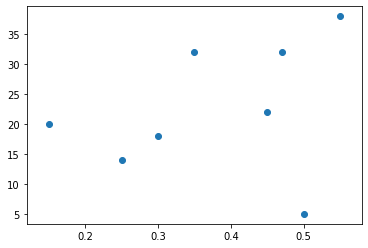

In [2]:
x = np.array([0.5, 0.15, 0.30, 0.25, 0.35, 0.45, 0.47, 0.55]).reshape((-1, 1))
y = np.array([5, 20, 18, 14, 32, 22, 32, 38])

plt.scatter(x,y)

### Preparación de funciones

In [15]:
def regresion_lineal(x,b):
    return np.array(b[0] + b[1]*x).reshape(1,-1)

# Definir la función de error cuadrático medio
def error_cuadratico(y, y_pred):
    return np.mean((y - y_pred) ** 2)   

# Definir la función de gradiente del error
def grad_error(y, y_pred, x):
    return np.array([-2 * np.mean((y - y_pred)), -2 * np.mean((y - y_pred) * x)])

### Definición de híper-parámetros

In [21]:
eta      = 0.01
max_iter = 10000

### (1) Inicializar parámetros del modelo

In [22]:
# Inicializar parámetros de la regresión lineal y = w[0] + w[1]*x
w = np.random.rand(2)
print(w)

[0.97881398 0.5567323 ]


### (2) Evaluar el modelo en la función de error

In [23]:
# Obtener predicción del modelo
y_pred = regresion_lineal(x, w)
# Evaluar en la función de error
error = error_cuadratico(y, y_pred)
print(error)

562.3092694282298


### (3) Iteraciones del método

In [24]:
for i in range(max_iter):
    # Calcular gradiente
    g = grad_error(y, y_pred, x)
    # Actualizar parámetros
    w = w - eta * g
    # Evaluar el modelo en la función del error
    y_pred = regresion_lineal(x, w)
    error = error_cuadratico(y, y_pred)
print(w)

[19.74109172  7.63949214]


### Evaluación del método

13.813835770528684
23.340832395950503


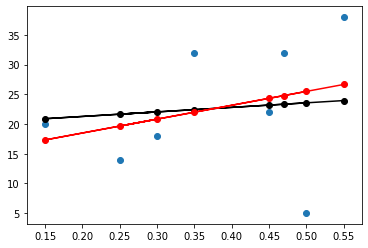

In [25]:
# Usando el modelo programado
y_pred = regresion_lineal(x,w)

# Usando el modelo de sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred_sk = model.predict(x)

plt.plot(x,y_pred[0,],marker='o',color='black')
plt.plot(x,y_pred_sk,marker='o',color='red')
plt.scatter(x,y)

print(model.intercept_)
print(model.coef_[0])

### En forma de función

In [26]:
def gd(x, y, eta = 0.01, max_iter = 1000):
    # Inicializar parámetros
    w = np.random.rand(2)
    
    # Evaluar modelo en función de error
    y_pred = regresion_lineal(x,w)
    error  = error_cuadratico(y,y_pred)
    
    for i in range(max_iter):
        # Calcular gradiente
        g = grad_error(y,y_pred,x)

        # Actualizar parámetros
        w = w - eta*g

        # Evaluar el modelo en la función del error
        y_pred = regresion_lineal(x,w)
        error = error_cuadratico(y,y_pred)

    return w

# Gradiente Descendente con Momento
Este es un ejemplo del uso del gradiente descendente con momento para obtener los parámetros de un modelo supervisado por regresión lineal.

In [29]:
def gdm(x, y, eta = 0.01, alpha = 0.1, max_iter = 1000):
    # Inicializar parámetros
    w     = np.random.rand(2)
    # Inicializar parámetros en la iteración anterior
    w_prev = w
    # Evaluar modelo en función de error
    y_pred = regresion_lineal(x,w)
    error  = error_cuadratico(y,y_pred)
    
    for i in range(max_iter):
        # Calcular gradiente
        g = grad_error(y,y_pred,x)
        # Calcular la diferencia de parámetros
        dw = w - w_prev
        w_prev = w
        # Actualizar parámetros
        w = w_prev - eta * g + alpha * dw
        # Evaluar el modelo en la función del error
        y_pred = regresion_lineal(x,w)
        error = error_cuadratico(y,y_pred)
    return w

### Ejecutar ambos métodos de gradiente

In [30]:
print(gd(x,y))
print(gdm(x,y))

[19.86811925  7.30299536]
[19.91271593  7.18485846]
